# Student Performance Prediction Workflow (Dataset Asli)

Notebook ini menggunakan dataset asli **Student_performance_data _.csv**, dari website kaggle (source) : https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

Langkah-langkah:
1. Import dataset
2. Explorasi awal
3. Preprocessing (impute missing, encoding, feature selection)
4. Pembuatan label performance (aman/beresiko dari GPA)
5. Simpan hasil preprocessing → `data_integration.csv`
6. Split train/test
7. Training Decision Tree
8. Cross Validation
9. Evaluasi (Confusion Matrix & Classification Report)
10. Visualisasi
11. Simpan hasil prediksi → `data_validation.csv`


In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Asadul\Downloads\Data Mining Kelompok\Student_performance_data _.csv")
df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Lihat info dataset

In [2]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


Tangani missing values

In [3]:

# Tangani missing values (jika ada)
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

df.isnull().sum()


C:\Users\Asadul\AppData\Local\Temp\ipykernel_21620\3404171234.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Buat kolom performance: Aman (GPA >= 2.5), Beresiko (GPA < 2.5)

In [4]:

df["performance"] = np.where(df["GPA"] >= 2.5, "aman", "beresiko")
df["performance"].value_counts()


performance
beresiko    1686
aman         706
Name: count, dtype: int64

Simpan hasil preprocessing

In [5]:

df.to_csv(r"C:\Users\Asadul\Downloads\Data Mining Kelompok\data_integration.csv", index=False)
print("data_integration.csv berhasil disimpan!")


data_integration.csv berhasil disimpan!


Drop kolom ID dan Target

In [6]:

X = df.drop(columns=["performance","StudentID"])  
y = df["performance"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [8]:

scores = cross_val_score(clf, X, y, cv=5)
print("Cross Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross Validation Scores: [1.         1.         1.         0.99790795 0.76778243]
Mean Accuracy: 0.9531380753138075


In [9]:

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[217   1]
 [  0 500]]

Classification Report:
               precision    recall  f1-score   support

        aman       1.00      1.00      1.00       218
    beresiko       1.00      1.00      1.00       500

    accuracy                           1.00       718
   macro avg       1.00      1.00      1.00       718
weighted avg       1.00      1.00      1.00       718



In [10]:

results = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred
})
results.to_csv(r"C:\Users\Asadul\Downloads\Data Mining Kelompok\data_validation.csv", index=False)
print("data_validation.csv berhasil disimpan!")


data_validation.csv berhasil disimpan!


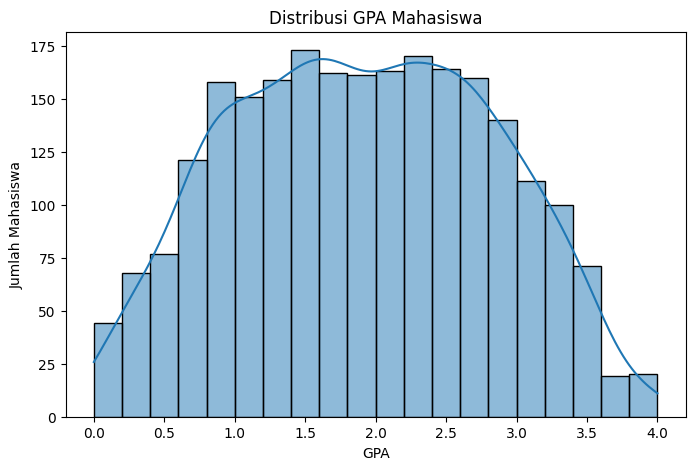

In [11]:

plt.figure(figsize=(8,5))
sns.histplot(df["GPA"], bins=20, kde=True)
plt.title("Distribusi GPA Mahasiswa")
plt.xlabel("GPA")
plt.ylabel("Jumlah Mahasiswa")
plt.show()


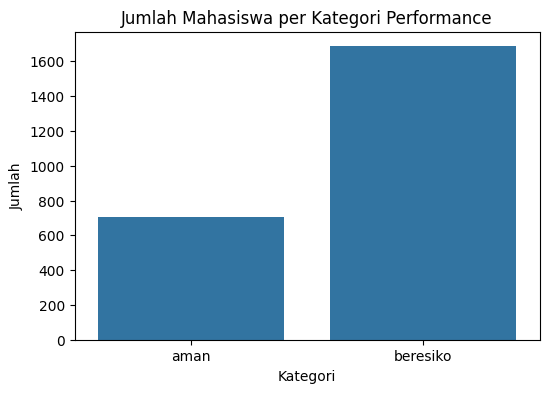

In [12]:

plt.figure(figsize=(6,4))
sns.countplot(x="performance", data=df)
plt.title("Jumlah Mahasiswa per Kategori Performance")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.show()


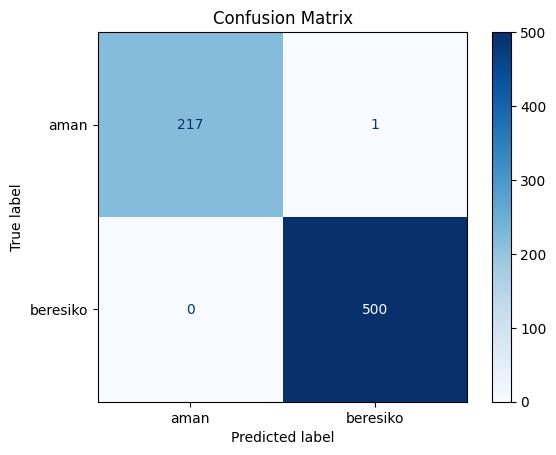

In [13]:

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


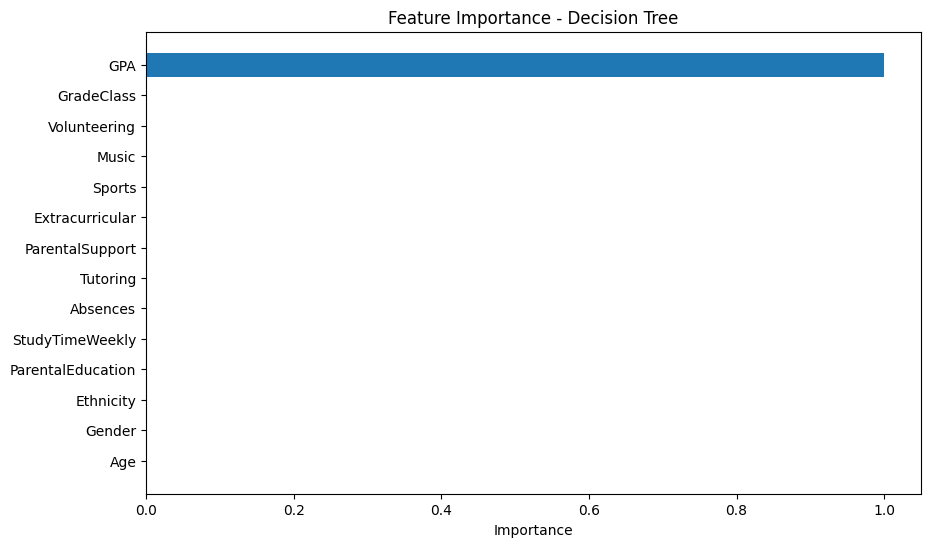

In [14]:

feature_importances = clf.feature_importances_
features = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx], feature_importances[sorted_idx])
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance")
plt.show()
